In [1]:
# Import Modules
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [2]:
# Initialising the CNN
classifier = Sequential()
# Convolution
classifier.add(Conv2D(32,(3,3),input_shape = (64,64,3), activation = 'relu'))
# Pooling
# classifier.add(MaxPooling2D(pool_size=(2,2)))
# Adding a Second convolutional_layer
classifier.add(Conv2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,3)))

In [3]:
# Flattening
classifier.add(Flatten())
# Full Connection
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))
# Compiling the CNN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [4]:
# Fitting the CNN to the Images
from keras.preprocessing.image import ImageDataGenerator
train_data = ImageDataGenerator(rescale=1./255, shear_range= 0.2,zoom_range= 0.2, horizontal_flip= True)
test_data = ImageDataGenerator(rescale=1./255)

In [5]:
training_set = train_data.flow_from_directory('dataset/training_set',target_size= (64,64),batch_size=32,class_mode='binary')

Found 8005 images belonging to 2 classes.


In [6]:
test_set = train_data.flow_from_directory('dataset/test_set',target_size=(64,64),batch_size=32,class_mode='binary')

Found 2023 images belonging to 2 classes.


In [7]:
classifier.fit(training_set,steps_per_epoch=200,epochs=5,validation_data=test_set,validation_steps=10)

Epoch 1/5
200/200 [==============================] - 346s 2s/step - loss: 0.6805 - accuracy: 0.5594 - val_loss: 0.6278 - val_accuracy: 0.6469
Epoch 2/5
200/200 [==============================] - 216s 1s/step - loss: 0.6060 - accuracy: 0.6714 - val_loss: 0.5560 - val_accuracy: 0.7375
Epoch 3/5
200/200 [==============================] - 180s 897ms/step - loss: 0.5724 - accuracy: 0.7092 - val_loss: 0.5754 - val_accuracy: 0.6938
Epoch 4/5
200/200 [==============================] - 217s 1s/step - loss: 0.5392 - accuracy: 0.7301 - val_loss: 0.5301 - val_accuracy: 0.7375
Epoch 5/5
200/200 [==============================] - 190s 951ms/step - loss: 0.5029 - accuracy: 0.7533 - val_loss: 0.5102 - val_accuracy: 0.7563


In [8]:
import numpy as np
from keras.preprocessing import image
def get_prediction(path):
    test_image = image.load_img(path,target_size=(64,64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = classifier.predict(test_image)
    training_set.class_indices
    if result[0][0] == 1:
        return 'dog'
    else:
        return 'cat'

In [9]:
print(get_prediction('dataset/single_prediction/cat_or_dog_1.jpg'))

cat


In [10]:
print(get_prediction('dataset/single_prediction/cat_or_dog_2.jpg'))

dog


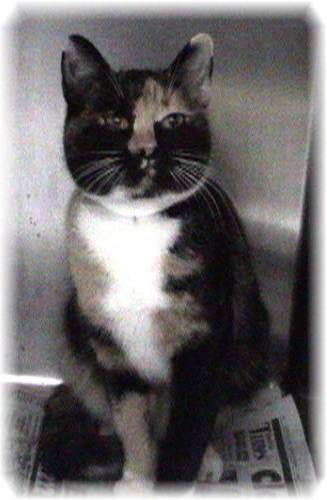

In [11]:
from IPython.display import Image
Image(filename="dataset/single_prediction/cat_or_dog_1.jpg")

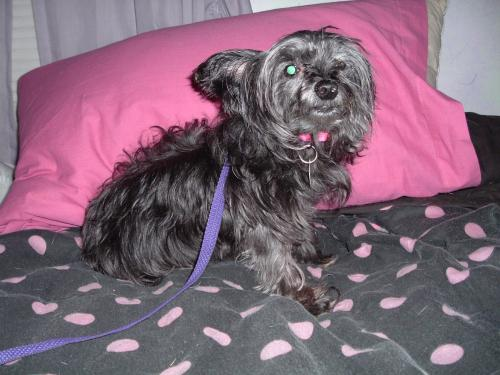

In [12]:
from IPython.display import Image
Image(filename="dataset/single_prediction/cat_or_dog_2.jpg")